## Create tokens from python source code

In [7]:
import pygments.token
import pygments.lexers

def tokenize(filename):
    file = open(filename, "r")
    text = file.read()
    file.close()
    lexer = pygments.lexers.python.PythonLexer()
    tokens = lexer.get_tokens(text)
    tokens = list(tokens)
    result = []
    for i,token in enumerate(tokens):
        if token[0] == pygments.token.Name.Function:
            result.append('F') #Append Functionnames
        elif token[0] == pygments.token.Name and not tokens[i+1][1] == '(':
            result.append('V') #Append VariableNames
        elif token[0] == pygments.token.Name and tokens[i+1][1] == '(':
            result.append('C') #Append Call
        elif token[0] in pygments.token.Literal.Number:
            result.append('N') #Append indent
        elif token[0] in pygments.token.Literal.String and token[1] != '\'':
            result.append('S')  #Append strings
        elif token[0] in pygments.token.Keyword:
            result.append('K') #Append Keyword
        elif token[0] == pygments.token.Text and token[1] == '\t':
            result.append('I') #Append indent
        elif token[0] == pygments.token.Text and token[1] == '\n':
            result.append('L') #Append linefeed
        elif token[0] == pygments.token.Operator.Word:
            result.append('O') ##Append Operator Words (in, and, not)
        elif token[0] == pygments.token.Operator and token[1] == '==':
            result.append('C') ##All remaining operators
        elif token[0] == pygments.token.Operator or token[0] == pygments.token.Punctuation:
            result.append(token[1]) ##All remaining operators
        elif token[0] == pygments.token.Name.Builtin:
            result.append('B') #Builtin functions (range,sort ....)
        elif token[0] in pygments.token.Comment:
            pass   #Ignore Comments
        else:
            pass #Ignore other Input
        
        #print(token)  

    return result

In [30]:
file_A = "./TESTFILES/basics_strings_1.py"
file_B = "./TESTFILES/basics_strings_2.py"

token1 = tokenize(file_A)
token2 = tokenize(file_B)

In [3]:
def toText(arr):
    cleanText = ''.join(str(x[0]) for x in arr)
    return cleanText

In [31]:
print("TOKENS 1: " + toText(token1))
print("\nTOKENS 2: " + toText(token2))

TOKENS 1: LB(SSS)LB(SSS)LLLLB(N+N)LB(N**N)LB(N/N)LB(N%N)LB(NV*NV)LB(B(N,N))LV=N+NVLB(V.V)LB(V.V)LLLLV=N/NLV=NLV*VLLLLLLV=SSSLV=SSSLV=SSSLLB(VCV)LB(VOV)LB(VOV)LB(VCV)LLV=SSSSSLB(V)LLB(SSSSSSSSSSSS)LLLLV=SLV=NLB(V)LB(V)LB(B(V)+S+V+S)LLB(SSSS%(V,V))LLLV=SLB(V[N])LB(V[N:N])LB(V[:N])LB(V[N:])LB(V[:N]+V[N:])LB(SSS)LLB(V[:-N])LB(V[-N:])LB(V[:-N]+V[-N:])LLB(V[-N])LLB(B(V))LLLL

TOKENS 2: B(N+N)LB(N**N)LB(N/N)LB(N%N)LV=N+NVLB(V.V)LB(V.V)LLV=SSSLV=SSSLV=SSSLLB(VCV)LB(VOV)LB(VOV)LB(VCV)LLV=SSSSSLB(V)LV=SLB(V[N])LB(V[N:N])LB(V[:N])LB(V[N:])LB(V[:N]+V[N:])LB(SSS)LB(V[:-N])LB(V[-N:])LB(V[:-N]+V[-N:])LB(V[-N])LB(B(V))LLB(SSSSSSSSSSSS)LV=SLV=NLB(V)LB(V)LB(B(V)+S+V+S)LLB(SSSS%(V,V))L


## Tokens as NP-Array

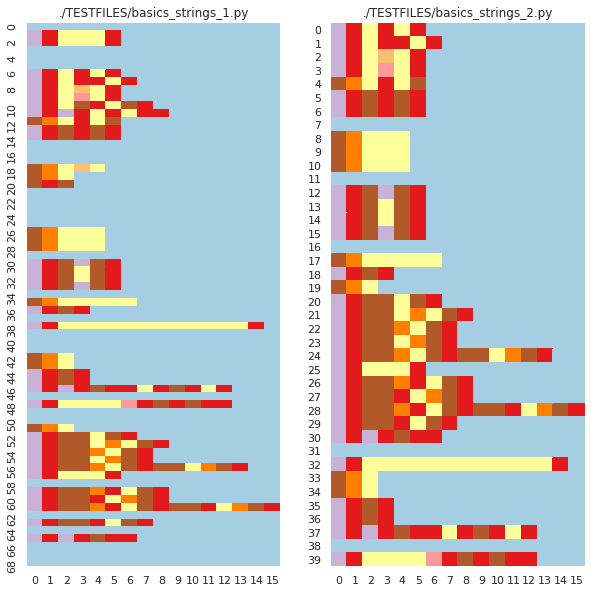

In [34]:
import numpy as np
%matplotlib inline
import itertools
import matplotlib.pyplot as plt
import seaborn as sns;

def to_array(token):
    code_representation = []
    result = []
    
    for t in token:
        if (t == 'L'):
                code_representation.append(result)
                result = [] #Reset result
        else:
            result.append(ord(t))
    return np.array(list(itertools.zip_longest(*code_representation, fillvalue=0))).T

data1 = to_array(token1)
data2 = to_array(token2)

max_row = 0
max_col = 0
extend_d1 = data1.shape
extend_d2 = data2.shape


if (extend_d1[0] > extend_d2[0]):
    max_row = extend_d1[0]
else:
    max_row = extend_d2[0]

if (extend_d1[1] > extend_d2[1]):
    max_col = extend_d1[1]
else:
    max_col = extend_d2[1]
    
sns.color_palette("tab10")
f,axes = plt.subplots(1,2,figsize=(10,10))
sns.heatmap(data1,ax=axes[0],cbar=False, cmap="Paired")
sns.heatmap(data2,ax=axes[1],cbar=False, cmap="Paired")
axes[0].set_title(file_A)
axes[1].set_title(file_B)

#plt.savefig("./test.png")

In [ ]:
#Showing array using filter

search_term = input("Please type a key to apply filter: ")

mask1 = (data1 == ord(search_term))
mask2 = (data2 == ord(search_term))

f,axes = plt.subplots(1,2,figsize=(10,10))
sns.heatmap(data1,ax=axes[0],cbar=False, mask=mask1, cmap="Paired")
sns.heatmap(data2,ax=axes[1],cbar=False, mask=mask2, cmap="Paired")
axes[0].set_title(file_A)
axes[1].set_title(file_B)

## Cosine similarity for single characters

In [33]:
from collections import Counter
from math import sqrt

#Calculate word vector
def word2vec(word):
    count_characters = Counter(word)
    set_characters = set(count_characters)
    length = sqrt(sum(c*c for c in count_characters.values())) 
    return count_characters, set_characters, length

#Get cosine similarity
def get_cossim(v1, v2):
    # which characters are common to the two words?
    common = v1[1].intersection(v2[1])
    # by definition of cosine distance we have
    return sum(v1[0][ch]*v2[0][ch] for ch in common)/v1[2]/v2[2]

cos_sim = get_cossim(word2vec(token1), word2vec(token2))
print("Cosine similarity = %s" %cos_sim)

Cosine similarity = 0.9842143602607751


## Winnowing algorith

In [17]:
import hashlib

#sha-1 encoding is used to generate hash values
def hash(text):
    #this function generates hash values
    hashval = hashlib.sha1(text.encode('utf-8'))
    hashval = hashval.hexdigest()[-4 :]
    hashval = int(hashval, 16)  #using last 16 bits of sha-1 digest
    return hashval

#function to form k-grams out of the cleaned up text
def kgrams(text, k = 25):
    tokenList = list(text)
    n = len(tokenList)
    kgrams = []
    for i in range(n - k + 1):
        kgram = ''.join(tokenList[i : i + k])
        hv = hash(kgram)
        kgrams.append((kgram, hv, i, i + k))  #k-gram, its hash value, starting and ending positions are stored
        #these help in marking the plagiarized content in the original code.
    return kgrams

In [18]:
kGrams1 = kgrams(token1)
kGrams2 = kgrams(token2)

In [19]:
#takes k-gram list as input and returns a list of only hash values
def hashList(arr):
    HL = []
    for i in arr:
        HL.append(i[1])

    return HL

In [20]:
HL1 = hashList(kGrams1)  #hash list derived from k-grams list
HL2 = hashList(kGrams2)

In [21]:
#function that returns the index at which minimum value of a given list (window) is located
def minIndex(arr):
    minI = 0
    minV = arr[0]
    n = len(arr)
    for i in range(n):
        if arr[i] < minV:
            minV = arr[i]
            minI = i
    return minI


#form windows of hash values and use min-hash to limit the number of fingerprints
def fingerprints(arr, winSize = 4):
    arrLen = len(arr)
    prevMin = 0
    currMin = 0
    windows = []
    fingerprintList = []
    for i in range(arrLen - winSize):
        win = arr[i: i + winSize]  #forming windows
        windows.append(win)
        currMin = i + minIndex(win)
        if not currMin == prevMin:  #min value of window is stored only if it is not the same as min value of prev window
            fingerprintList.append(arr[currMin])  #reduces the number of fingerprints while maintaining guarantee
            prevMin = currMin  #refer to density of winnowing and guarantee threshold (Stanford paper)

    return fingerprintList

In [22]:
fpList1 = fingerprints(HL1)
fpList2 = fingerprints(HL2)

In [24]:
print(fpList1)
print(fpList2)

[45566, 43642, 39382, 38246, 18770, 30444, 8970, 18770, 30444, 8970, 37894, 4490, 4750, 3479, 8431, 17981, 31693, 1393, 12707, 19884, 16190, 9834, 13110, 13606, 14775, 24769, 17030, 7429, 15429, 28730, 24067, 15162, 3597, 10706, 11544, 3589, 25541, 23487, 1100, 3105, 16331, 8610, 3667, 30782, 22495, 7094, 4328, 9832, 39498, 29073, 9177, 11473, 14652, 1426, 14371, 22298, 22403, 27155, 18890, 6156, 37816, 9077, 14980, 20807, 14376]
[15002, 2288, 3006, 9239, 25967, 34961, 14893, 9693, 18036, 17414, 2134, 1397, 4833, 10063, 6345, 31690, 7832, 7352, 7004, 4632, 5865, 24843, 26137, 29050, 5199, 37780, 33095, 26134, 20080, 31982, 26896, 19096, 15828, 3497, 9153, 2137, 34860, 27323, 24906, 23307, 12805, 33090, 5276, 5204, 9142, 8682, 9714, 17544, 25356, 13768, 15364, 17909, 10802, 6410, 6210, 15883, 4293, 18221, 1924, 3109, 8339, 19673, 16317, 1854, 14817, 4754, 476, 18492, 45374, 44350, 32663, 20360, 17849, 1263, 12689, 24918, 2207, 5804, 16335, 15746, 9045, 13486, 25214, 18815, 29629, 1541, 